# Showing Memory Usage of C programs
C/C++ programs use the memory of the computer in specific ways.

Here is an example of a possible memory layout.

| Memory Position | Element |
| :------- | :------- | 
| $2^{32}$ | End of memory for 32 bit addressing |
|  | ... | 
|  | HEAP (where dynamic memory is allocated)| 
|  | ... | 
|  | Stack (grows in downwards)| 
|  | ... | 
|  | INIT Section (where global variables are stored)| 
|  | ... | 
|  | Application  Code| 
|  | ... | 
| 0 | Start of memory | 

In [1]:
import sys
import os
import importlib.resources

if 'google.colab' in sys.modules:
    print("Running in Google Colab. Installing Punxa...")
    !git clone https://github.com/davidcastells/punxa.git /content/punxa
    !pip install wavedrom
    !pip install /content/punxa
    punxadir = '/content/punxa'
else:
    print("Not running in Google Colab. Skipping installation.")
    punxadir = importlib.resources.files('punxa')
    punxadir = os.path.dirname(punxadir)
print('Punxa dir:', punxadir)     

Not running in Google Colab. Skipping installation.
Punxa dir: C:\Projects\Research\INT_RISCV\punxa


In [2]:
tracemem_dir = os.path.join(punxadir, "test", "proxykernel_software", "tracemem")
if not(tracemem_dir in sys.path):
    sys.path.append(tracemem_dir)
import tb_TraceMem as tm

appending .. to path


In [3]:
import punxa

In [4]:
elf = os.path.join(tracemem_dir, 'tracemem.elf')
tm.prepareTest(elf)

MEM WIDTH 64
original area: 0000000000010000-000000000001FFFF
reshaped area: 0000000000010000-000000000001FFFF
original area: 0000000000090000-000000000009FFFF
reshaped area: 0000000000090000-000000000009FFFF
original area: 00000000000A0000-00000000000BFFFF
reshaped area: 00000000000A0000-00000000000BFFFF

	Stack base: 0x0000000000090000 size: 0x0000000000010000
	Heap base:  0x00000000000A0000 size: 0x0000000000020000


In [5]:
tm.step(10000)

_start :
M 00010116: 0000B197     AUIPC r3 = pc + 0000B000 -> 000000000001B116
M 0001011A: CFA18193     ADDI r3 = r3 + -774 -> 000000000001AE10
M 0001011E: 23018513     ADDI r10 = r3 + 560 -> 000000000001B040
M 00010122: 0000B617     AUIPC r12 = pc + 0000B000 -> 000000000001B122
M 00010126: 4EE60613     ADDI r12 = r12 + 1262 -> 000000000001B610
M 0001012A: 8E09         C.SUB r12 = r12 - r10 -> 00000000000005D0
M 0001012C: 4581         C.LI r11 = 0 -> 0000000000000000
M 0001012E: 6D9000EF     JAL pc + 3800  r1=pc+4 ->  11006 <memset>,0000000000010132
memset :
M 00011006: 433D         C.LI r6 = 15 -> 000000000000000F
M 00011008: 872A         C.MV r14 = r10 -> 000000000001B040
M 0001100A: 02C37163     BGEU r6 >= r12 ? -> False 000000000001102C
M 0001100E: 00F77793     ANDI r15 = r14 & 15 -> 0000000000000000
M 00011012: E3C1         C.BNEZ r15 != 0 ? False -> 0000000000000000
M 00011014: E1BD         C.BNEZ r11 != 0 ? False -> 0000000000000000
M 00011016: FF067693     ANDI r13 = r12 & -16 

M 000108EC: 63E000EF     JAL pc + 1598  r1=pc+4 ->  10F2A <_sbrk_r>,00000000000108F0
_sbrk_r :
M 00010F2A: 1101         C.ADDI r2 = r2 + -32 -> 000000000009FF38
M 00010F2C: E822         C.SDSP [r2 + 16]=r8 -> [000000000009FF48]=000000000001A480
M 00010F2E: E426         C.SDSP [r2 + 8]=r9 -> [000000000009FF40]=0000000000000020
M 00010F30: 842A         C.MV r8 = r10 -> 000000000001ACA8
M 00010F32: 852E         C.MV r10 = r11 -> 0000000000000FC0
M 00010F34: EC06         C.SDSP [r2 + 24]=r1 -> [000000000009FF50]=00000000000108F0
M 00010F36: 2401AC23     SW [r3 + 600] = r0 -> [1B068 <errno>]=00000000
M 00010F3A: 207060EF     JAL pc + 27142  r1=pc+4 ->  17940 <_sbrk>,0000000000010F3E
_sbrk :
M 00017940: 2701B703     LD r14 = [r3 + 624]-> [1B080 <heap_end.0>]=00000000000C0040
M 00017944: 1141         C.ADDI r2 = r2 + -16 -> 000000000009FF28
M 00017946: E406         C.SDSP [r2 + 8]=r1 -> [000000000009FF30]=0000000000010F3E
M 00017948: 87AA         C.MV r15 = r10 -> 0000000000000FC0
M 0001794A:

M 0001632E: ED06         C.SDSP [r2 + 152]=r1 -> [000000000009FCE0]=000000000001377A
M 00016330: 0027F713     ANDI r14 = r15 & 2 -> 0000000000000000
M 00016334: 842E         C.MV r8 = r11 -> 000000000001B198
M 00016336: CB19         C.BEQZ r14 == 0 ? True -> 000000000001634C
M 0001634C: 01259583     LH r11 = [r11 + 18] 
-> [000000000001B1AA]=0000000000000001
M 00016350: E526         C.SDSP [r2 + 136]=r9 -> [000000000009FCD0]=000000000001ACA8
M 00016352: E14A         C.SDSP [r2 + 128]=r18 -> [000000000009FCC8]=000000000001B198
M 00016354: FCCE         C.SDSP [r2 + 120]=r19 -> [000000000009FCC0]=0000000000000000
M 00016356: F8D2         C.SDSP [r2 + 112]=r20 -> [000000000009FCB8]=0000000000000000
M 00016358: 84AA         C.MV r9 = r10 -> 000000000001ACA8
M 0001635A: 0605C463     BLT r11 < r0 ? -> 00000000000163C2 False
M 0001635E: 0030         C.ADDI4SPN r12 = r2 + 8 -> 000000000009FC50
M 00016360: 206000EF     JAL pc + 518  r1=pc+4 ->  16566 <_fstat_r>,0000000000016364
_fstat_r :
M 0001

M 0001210C: 85CA         C.MV r11 = r18 -> 000000000001B198
M 0001210E: 781000EF     JAL pc + 3968  r1=pc+4 ->  1308E <__sprint_r>,0000000000012112
__sprint_r :
M 0001308E: 6A1C         C.LD r15 = [r12 + 16] -> [000000000009FDF8]=0000000000000004
M 00013090: 1141         C.ADDI r2 = r2 + -16 -> 000000000009FCF8
M 00013092: E022         C.SDSP [r2 + 0]=r8 -> [000000000009FCF8]=000000000009FE88
M 00013094: E406         C.SDSP [r2 + 8]=r1 -> [000000000009FD00]=0000000000012112
M 00013096: 8432         C.MV r8 = r12 -> 000000000009FDE8
M 00013098: EB81         C.BNEZ r15 != 0 ? True -> 00000000000130A8
M 000130A8: 2DE000EF     JAL pc + 734  r1=pc+4 ->  13386 <__sfvwrite_r>,00000000000130AC
__sfvwrite_r :
M 00013386: 6A1C         C.LD r15 = [r12 + 16] -> [000000000009FDF8]=0000000000000004
M 00013388: 1C078B63     BEQ r15 == r0 ? -> 000000000001355E False
M 0001338C: 01059703     LH r14 = [r11 + 16] 
-> [000000000001B1A8]=0000000000002089
M 00013390: 711D         C.ADDI16SP r2 = r2 + -96 ->

memmove :
M 0001394A: 02A5F263     BGEU r11 >= r10 ? -> False 000000000001396E
M 0001394E: 00C58733     ADD r14 = r11 + r12 -> 000000000009FE64
M 00013952: 00E57E63     BGEU r10 >= r14 ? -> True 000000000001396E
M 0001396E: 47FD         C.LI r15 = 31 -> 000000000000001F
M 00013970: 02C7E163     BLTU r15 < r12 ? -> 0000000000013992 False
M 00013974: 87AA         C.MV r15 = r10 -> 00000000000C0049
M 00013976: FFF60693     ADDI r13 = r12 + -1 -> 0000000000000000
M 0001397A: CE51         C.BEQZ r12 == 0 ? False -> 0000000000000000
M 0001397C: 0685         C.ADDI r13 = r13 + 1 -> 0000000000000001
M 0001397E: 96BE         C.ADD r13 = r13 + r15 -> 00000000000C004A
M 00013980: 0005C703     LBU r14 = [r11 + 0] -> [000000000009FE63]=34
M 00013984: 0785         C.ADDI r15 = r15 + 1 -> 00000000000C004A
M 00013986: 0585         C.ADDI r11 = r11 + 1 -> 000000000009FE64
M 00013988: FEE78FA3     SB [r15 + -1] = r14 -> [00000000000C0049]=34
M 0001398C: FED79AE3     BNE r15 != r13 ? False 00000000000139

M 0001310A: 6C2C         C.LD r11 = [r8 + 88] -> [000000000001B140]=0000000000000000
M 0001310C: C991         C.BEQZ r11 == 0 ? True -> 0000000000013120
M 00013120: 7C2C         C.LD r11 = [r8 + 120] -> [000000000001B160]=0000000000000000
M 00013122: C591         C.BEQZ r11 == 0 ? True -> 000000000001312E
M 0001312E: AF3FD0EF     JAL pc + -9486  r1=pc+4 ->  10C20 <__sfp_lock_acquire>,0000000000013132
__sfp_lock_acquire :
M 00010C20: 8082         C.JR r1 -> 0000000000013132
M 00013132: 00041823     SH [r8 + 16] = r0 -> [000000000001B0F8]=0000
M 00013136: AEDFD0EF     JAL pc + -9492  r1=pc+4 ->  10C22 <__sfp_lock_release>,000000000001313A
__sfp_lock_release :
M 00010C22: 8082         C.JR r1 -> 000000000001313A
M 0001313A: 60E2         C.LDSP r1 = [r2 + 24] -> [000000000009FF90]=0000000000010C92
M 0001313C: 6442         C.LDSP r8 = [r2 + 16] -> [000000000009FF88]=000000000001B0E8
M 0001313E: 64A2         C.LDSP r9 = [r2 + 8] -> [000000000009FF80]=000000000001B2F8
M 00013140: 854A        

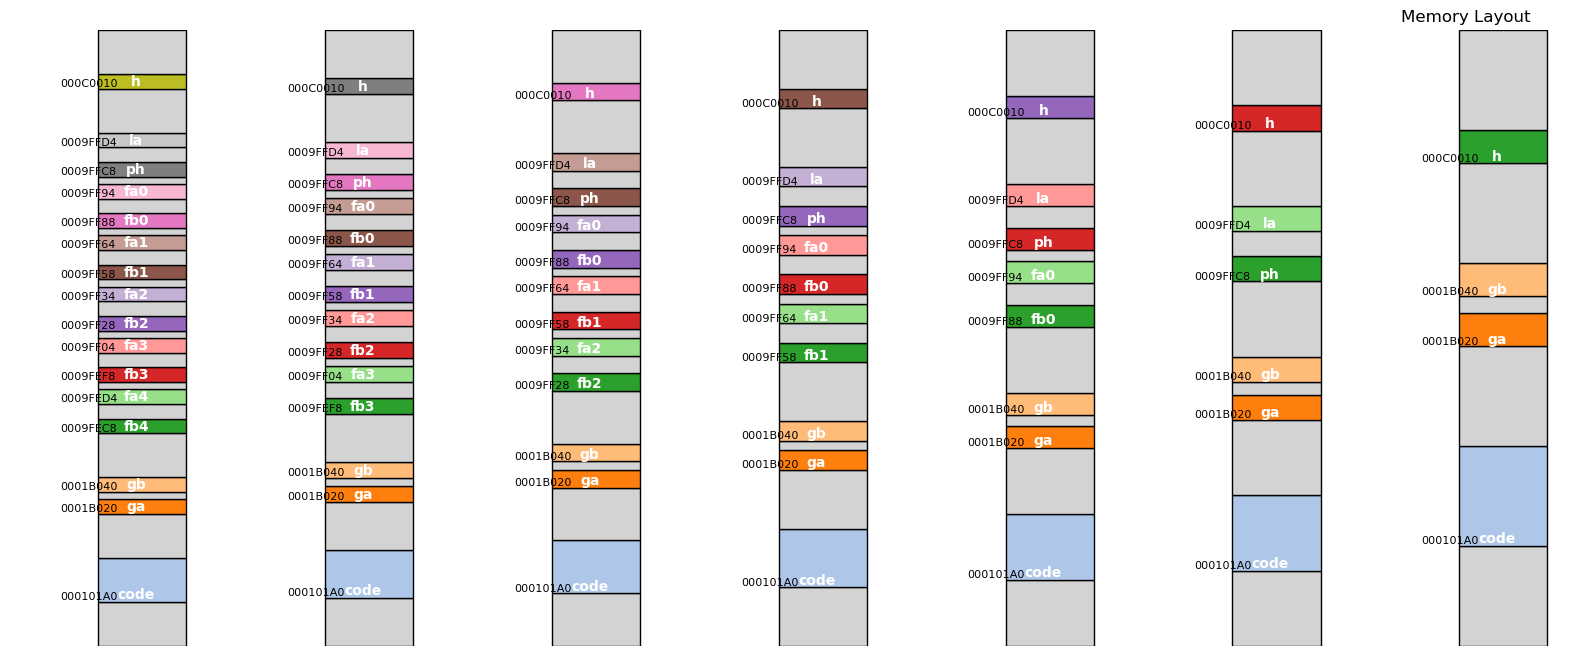

In [6]:
tm.showMemTraces()